<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time series exercises

--- 

<h1>Lab Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Load-the-CRSP-daily-returns.-Fit-an-ARMA-model-to-the-GE-column-and-tune-the-parameters." data-toc-modified-id="1.-Load-the-CRSP-daily-returns.-Fit-an-ARMA-model-to-the-GE-column-and-tune-the-parameters.-1">1. Load the CRSP daily returns. Fit an ARMA model to the GE column and tune the parameters.</a></span><ul class="toc-item"><li><span><a href="#Bonus:-Fit-also-the-other-columns." data-toc-modified-id="Bonus:-Fit-also-the-other-columns.-1.1">Bonus: Fit also the other columns.</a></span></li><li><span><a href="#Obtain-a-date-index-by-combining-the-year,-month-and-day-data." data-toc-modified-id="Obtain-a-date-index-by-combining-the-year,-month-and-day-data.-1.2">Obtain a date index by combining the year, month and day data.</a></span></li><li><span><a href="#Plot-the-timeseries-and-the-(partial)-autocorrelations" data-toc-modified-id="Plot-the-timeseries-and-the-(partial)-autocorrelations-1.3">Plot the timeseries and the (partial) autocorrelations</a></span></li><li><span><a href="#Fit-the-ARMA-model" data-toc-modified-id="Fit-the-ARMA-model-1.4">Fit the ARMA model</a></span></li><li><span><a href="#Do-the-same-with-the-CRSP-data" data-toc-modified-id="Do-the-same-with-the-CRSP-data-1.5">Do the same with the CRSP data</a></span></li></ul></li><li><span><a href="#Load-the-Mishkin-dataset." data-toc-modified-id="Load-the-Mishkin-dataset.-2">Load the Mishkin dataset.</a></span><ul class="toc-item"><li><span><a href="#Bonus:-Use-also-the-columns-on-one-month-inflation-rate-(pai1)-and-consumer-price-index-for-urban-consumers-(cpi)." data-toc-modified-id="Bonus:-Use-also-the-columns-on-one-month-inflation-rate-(pai1)-and-consumer-price-index-for-urban-consumers-(cpi).-2.1">Bonus: Use also the columns on one-month inflation rate (pai1) and consumer price index for urban consumers (cpi).</a></span></li><li><span><a href="#With-external-predictors" data-toc-modified-id="With-external-predictors-2.2">With external predictors</a></span></li></ul></li></ul></div>

In [1]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(font_scale=1.5)
%matplotlib inline

sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Load the CRSP daily returns. Fit an ARMA model to the GE column and tune the parameters.

#### Bonus: Fit also the other columns.

#### Obtain a date index by combining the year, month and day data.

In [2]:
data = sm.datasets.get_rdataset('CRSPday', package='Ecdat')

/Users/crahmede/anaconda3/lib/python3.7/site-packages/statsmodels/datasets/utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


In [3]:
print(data.__doc__)

+---------+-----------------+
| CRSPday | R Documentation |
+---------+-----------------+

Daily Returns from the CRSP Database
------------------------------------

Description
~~~~~~~~~~~

daily observations from 1969-1-03 to 1998-12-31

*number of observations* : 2528

*observation* : production units

*country* : United States

Usage
~~~~~

::

   data(CRSPday)

Format
~~~~~~

A dataframe containing :

year
   the year

month
   the month

day
   the day

ge
   the return for General Electric, Permno 12060

ibm
   the return for IBM, Permno 12490

mobil
   the return for Mobil Corporation, Permno 15966

crsp
   the return for the CRSP value-weighted index, including dividends

Source
~~~~~~

Center for Research in Security Prices, Graduate School of Business,
University of Chicago, 725 South Wells - Suite 800, Chicago, Illinois
60607, http://www.crsp.com.

References
~~~~~~~~~~

Davidson, R. and James G. MacKinnon (2004) *Econometric Theory and
Methods*, New York, Oxford University

In [4]:
df = data.data
df.head()

,year,month,day,ge,ibm,mobil,crsp
0,1989,1,3,-0.016760,0.000000,-0.002747,-0.007619
1,1989,1,4,0.017045,0.005128,0.005510,0.013016
2,1989,1,5,-0.002793,-0.002041,0.005479,0.002815
3,1989,1,6,0.000000,-0.006135,0.002725,0.003064
4,1989,1,9,0.000000,0.004115,0.005435,0.001633


In [5]:
df.index = pd.to_datetime(df[['year', 'month', 'day']])
df.head()

,year,month,day,ge,ibm,mobil,crsp
1989-01-03,1989,1,3,-0.016760,0.000000,-0.002747,-0.007619
1989-01-04,1989,1,4,0.017045,0.005128,0.005510,0.013016
1989-01-05,1989,1,5,-0.002793,-0.002041,0.005479,0.002815
1989-01-06,1989,1,6,0.000000,-0.006135,0.002725,0.003064
1989-01-09,1989,1,9,0.000000,0.004115,0.005435,0.001633


In [6]:
df.shape

(2528, 7)

#### Plot the timeseries and the (partial) autocorrelations

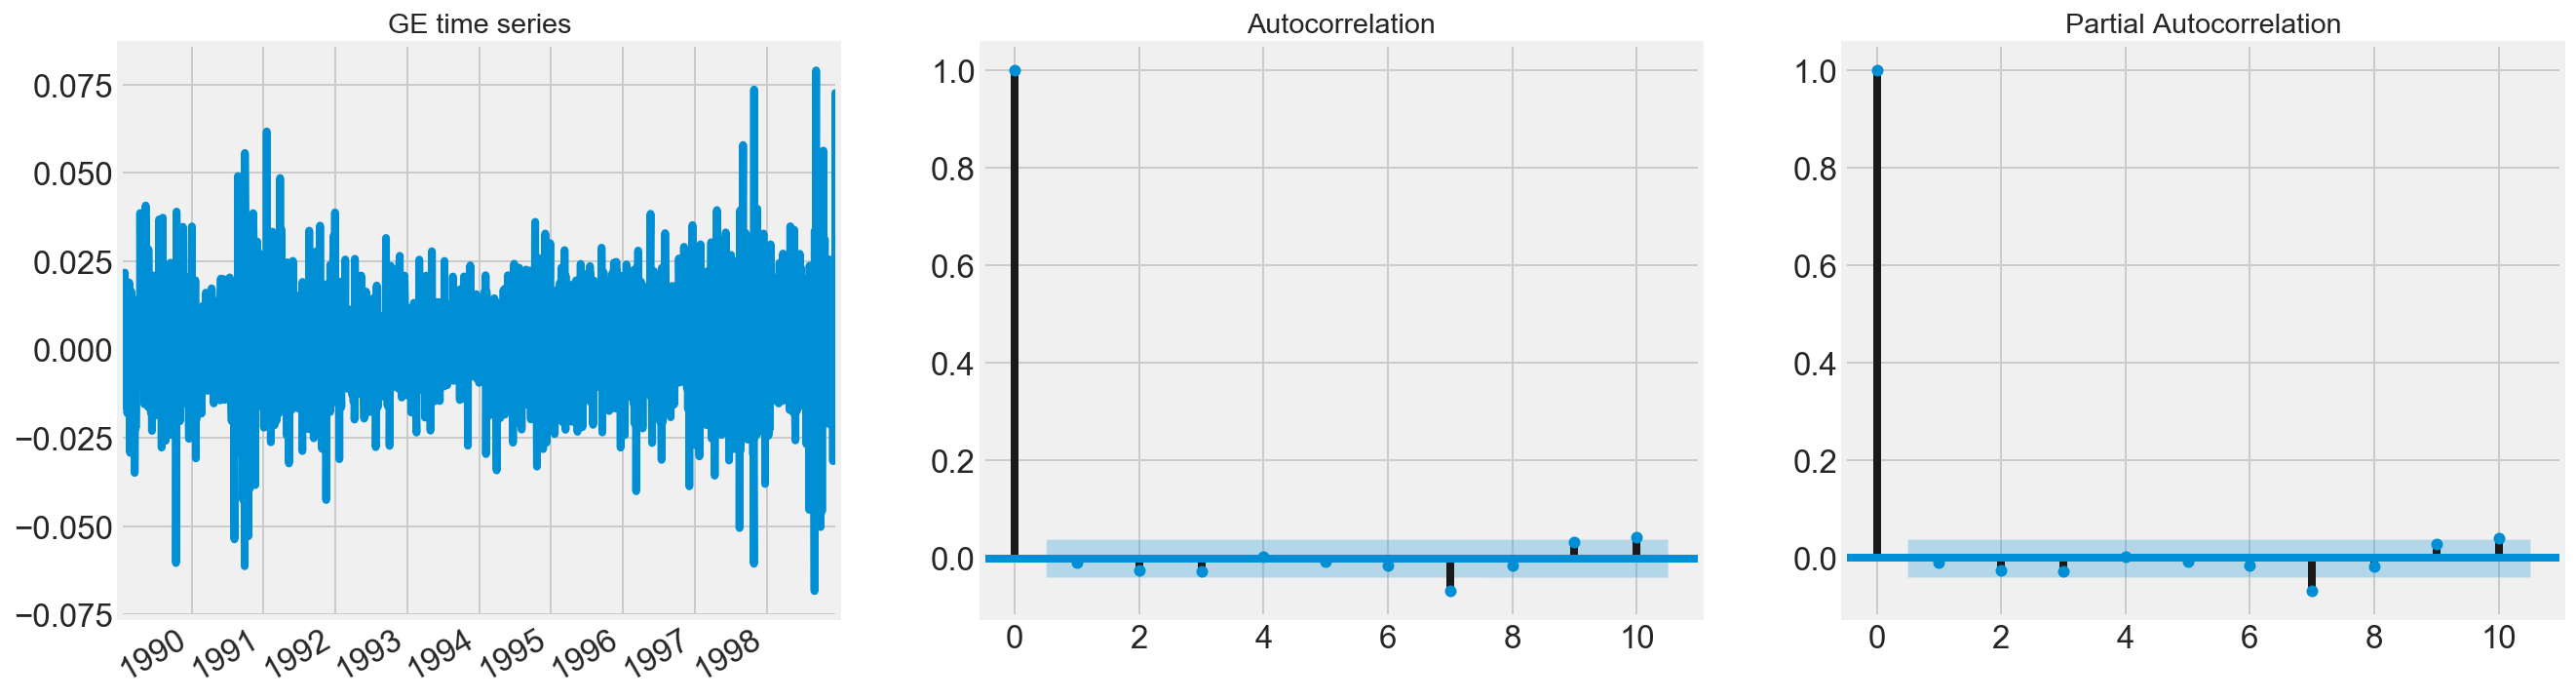

In [7]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 6))
df['ge'].plot(ax=ax[0], title='GE time series')
plot_acf(df['ge'], lags=10, alpha=0.05, ax=ax[1])
plot_pacf(df['ge'], lags=10, alpha=0.05, ax=ax[2])
plt.show()

#### Fit the ARMA model

(4, 2)


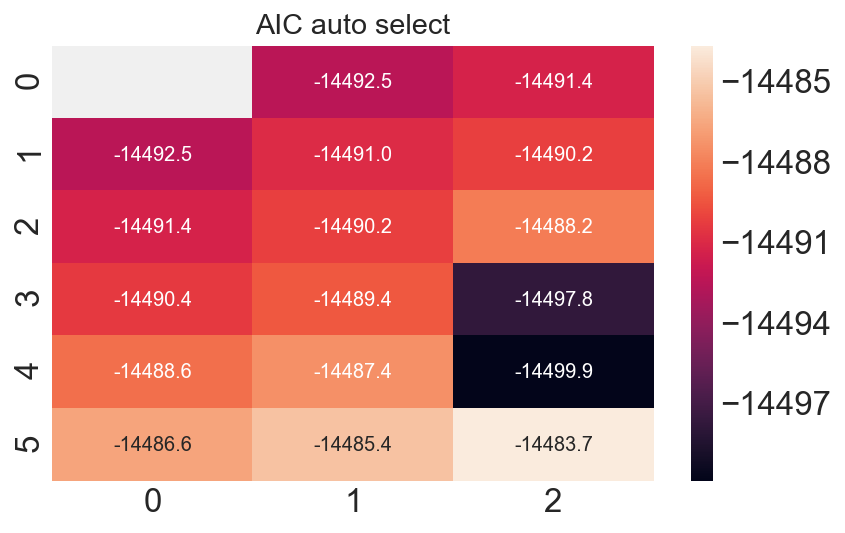

In [8]:
auto_select = sm.tsa.arma_order_select_ic(df['ge'],
                                          max_ar=5, max_ma=2, ic=['aic'],
                                          trend='nc',
                                          fit_kw={'method': 'css-mle',
                                                  'maxiter': 5000,
                                                  'solver': 'lbfgs'})

print(auto_select.aic_min_order)

sns.heatmap(auto_select['aic'], annot=True, fmt='.1f')
plt.ylim([auto_select['aic'].shape[0], 0])
plt.title('AIC auto select')
plt.show()

In [9]:
model = ARIMA(df['ge'], order=(4, 0, 2)).fit(trend='nc',
                                          maxiter=10000,
                                          start_params=np.array([0, 0, 0, 0, 0, 0]))
model.summary()

/Users/crahmede/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     ge   No. Observations:                 2528
Model:                     ARMA(4, 2)   Log Likelihood                7256.954
Method:                       css-mle   S.D. of innovations              0.014
Date:                Wed, 20 Nov 2019   AIC                         -14499.907
Time:                        18:09:30   BIC                         -14459.061
Sample:                             0   HQIC                        -14485.087
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.ge       0.0679      0.029      2.308      0.021       0.010       0.125
ar.L2.ge      -0.9744      0.034    -28.471      0.000      -1.041      -0.907
ar.L3.ge      -0.0246      0.021     -1.166      0.244      -0.066       0.017
ar.L4.ge      -0.0146      0.021     -0.686      0.493      -0.056       0.027
ma.L1.ge      -0.0718      0.022     -3.305      0.001      -0.114      -0.029
ma.L2.ge       0.9623      0.028     34.440      0.000       0.908       1.017
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0493           -1.0185j            1.0197           -0.2423
AR.2            0.0493           +1.0185j            1.0197            0.2423
AR.3           -0.8932           -8.0812j            8.1304           -0.2675
AR.4           -0.8932           +8.0812j            8.1304            0.2675
MA.1            0.0373           -1.0187j            1.0194           -0.2442
MA.2            0.0373           +1.0187j            1.0194            0.2442
-----------------------------------------------------------------------------
"""

In [10]:
model.sigma2

0.0001879738248576551

0 0 nan
0 1 0.00018158361491572264
0 2 0.00018157995715896422
0 3 0.00018157973684082413
0 4 0.0001815803947534566
1 0 0.0001815836233005969
1 1 0.00018158286932673764
1 2 0.00018158347902487123
1 3 0.00018158013478486695
1 4 0.000181575920733147
2 0 0.0001815795911500721
2 1 0.0001815796706078242
2 2 0.00018159374315739196
2 3 0.00018157935806470868
2 4 0.00018160576813573562
3 0 0.0001815793253721245
3 1 0.00018157884015604334
3 2 0.00018168731009504134
3 3 0.0001815808804861061
3 4 0.00018160672220072146
4 0 0.00018158298142671668
4 1 0.00018158501505566164
4 2 0.0001815173777769089
4 3 0.0001816072865578704
4 4 0.0001812438584688667
(4, 4) 0.0001812438584688667


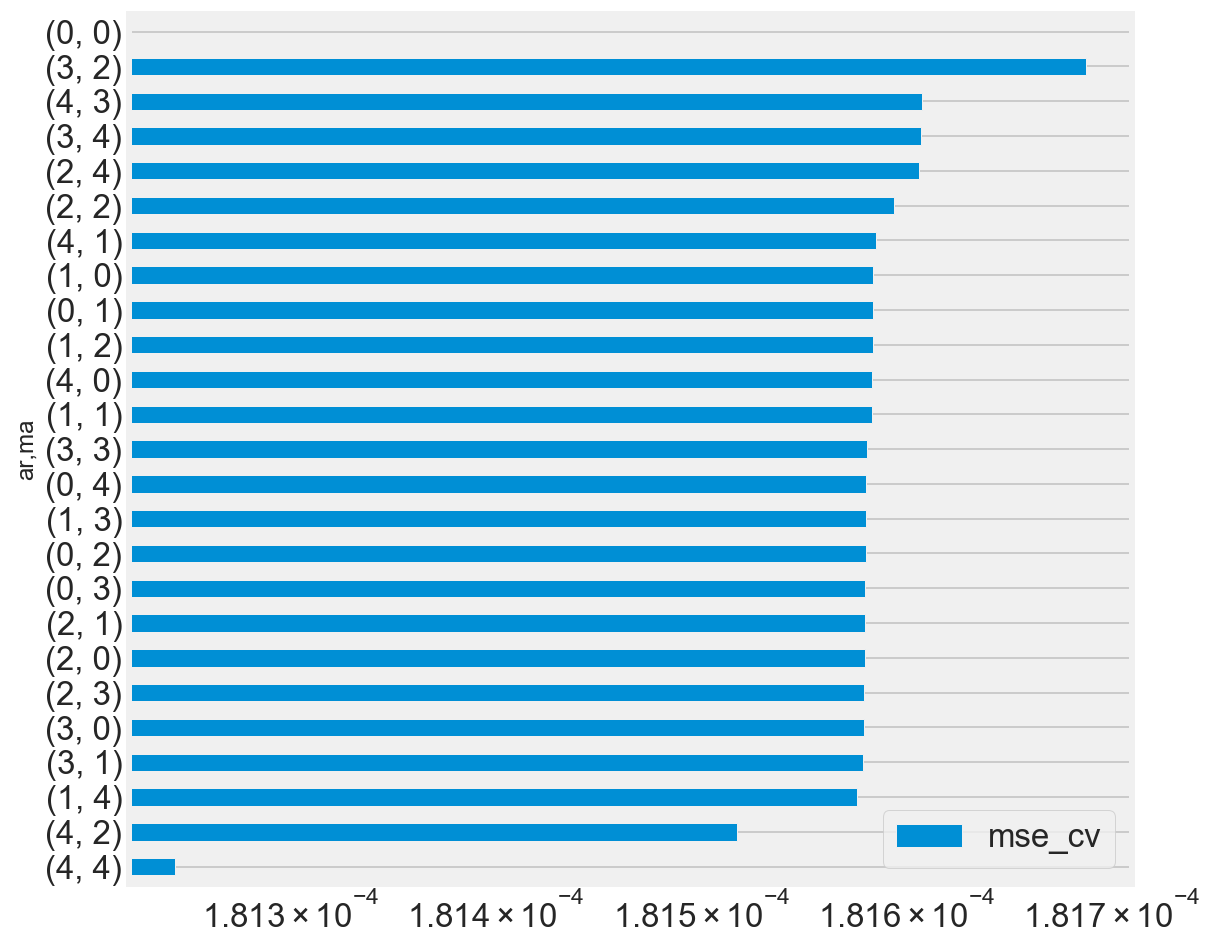

In [11]:
from sklearn.model_selection import TimeSeriesSplit

ts = TimeSeriesSplit(n_splits=3)
splits = [split for split in ts.split(df['ge'].values)]

best_order = (0, 0)
best_mse = 10**10
scores = []

for ar_order in range(5):
    for ma_order in range(5):
        try:
            mses = []
            for i in range(ts.n_splits):
                y_train = df['ge'].values[splits[i][0]]
                y_test = df['ge'].values[splits[i][1]]

                model_cv = ARIMA(y_train, order=(ar_order, 0, ma_order))
            
                result_cv = model_cv.fit(start_params=np.zeros(model_cv.k_ar+model_cv.k_ma),
                               solver='lbfgs', method='css', trend='nc', ic='BIC')
                predictions_test = result_cv.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
                mses.append(((y_test - (predictions_test))**2).mean())
                
            mse_mean = np.mean(mses)
            scores.append((model_cv.k_ar, model_cv.k_ma, mse_mean))
            print(model_cv.k_ar, model_cv.k_ma, mse_mean)
            if mse_mean < best_mse:
                best_mse = mse_mean
                best_order = (model_cv.k_ar, model_cv.k_ma)

        except:
                scores.append((model_cv.k_ar, model_cv.k_ma, np.nan))
                print(model_cv.k_ar, model_cv.k_ma, np.nan)
                
print(best_order, best_mse)

df_r = pd.DataFrame(scores, columns=['ar', 'ma', 'mse_cv'])
df_r.groupby(['ar', 'ma'])[['mse_cv']].max().sort_values(by='mse_cv').plot(kind='barh', figsize=(8, 8))
plt.xscale('log')
plt.show()

#### Do the same with the CRSP data

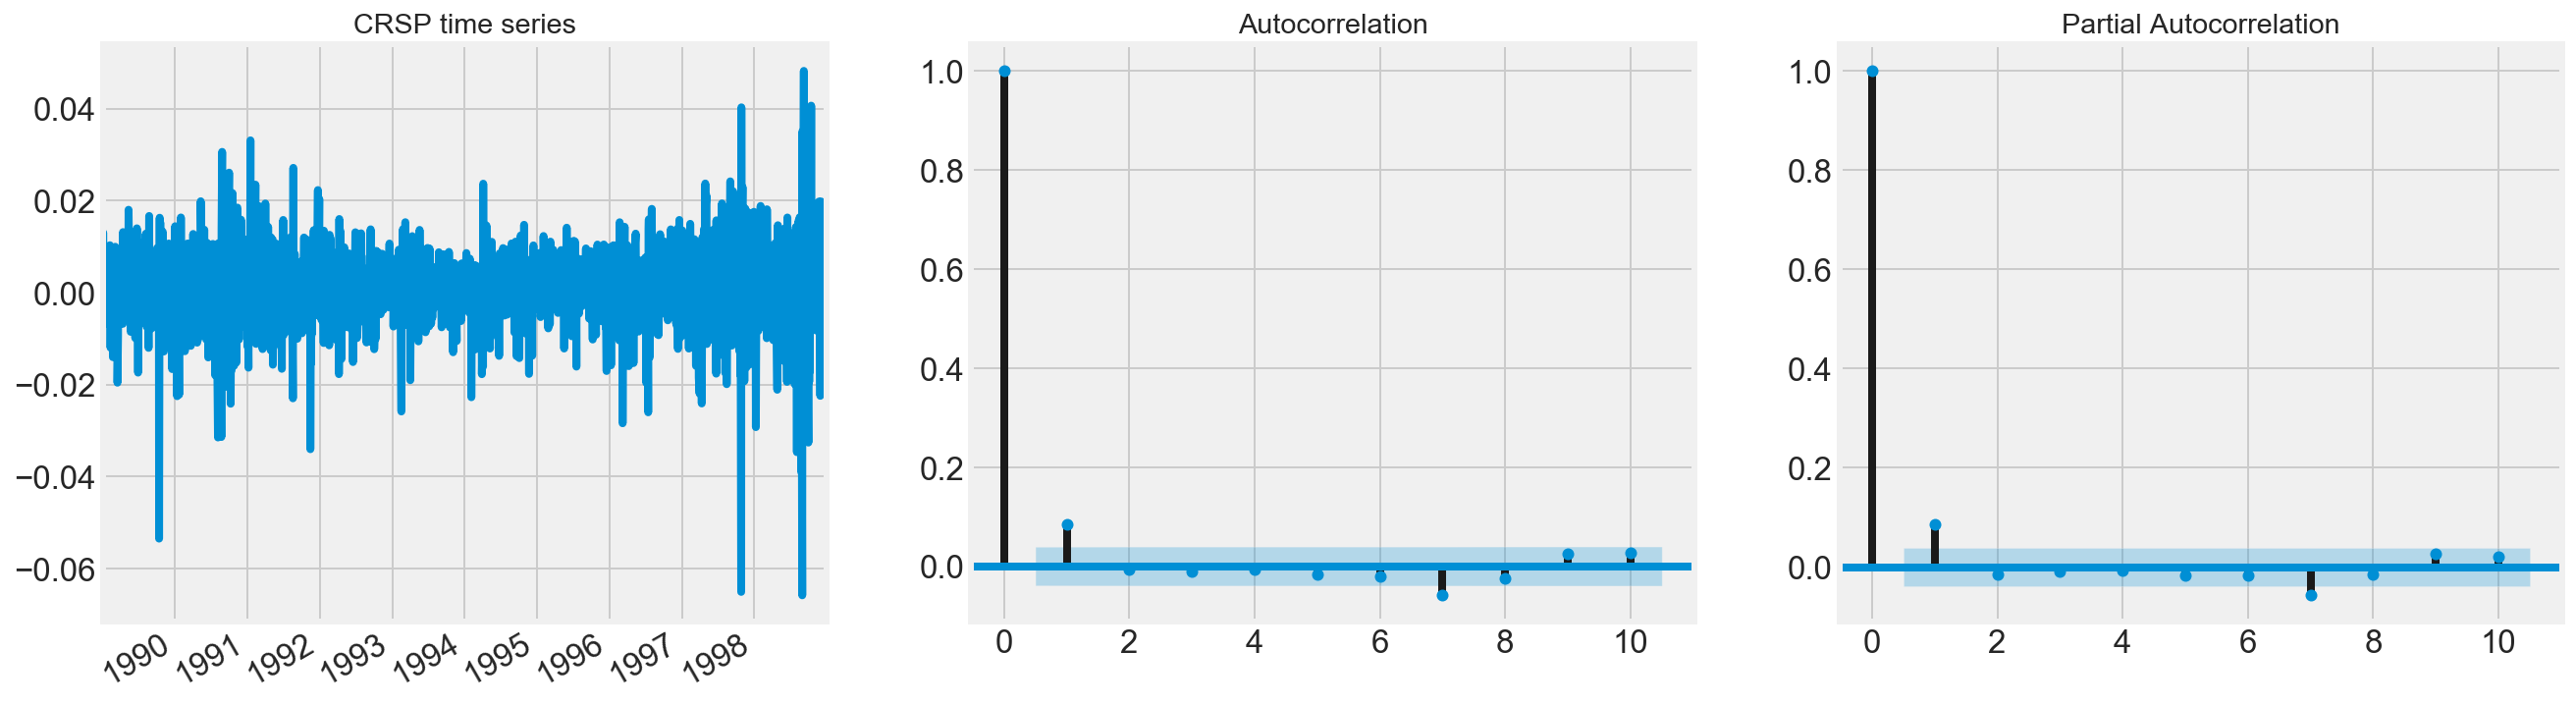

In [12]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 6))
df['crsp'].plot(ax=ax[0], title='CRSP time series')
plot_acf(df['crsp'], lags=10, alpha=0.05, ax=ax[1])
plot_pacf(df['crsp'], lags=10, alpha=0.05, ax=ax[2])
plt.show()

/Users/crahmede/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/crahmede/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(4, 2)


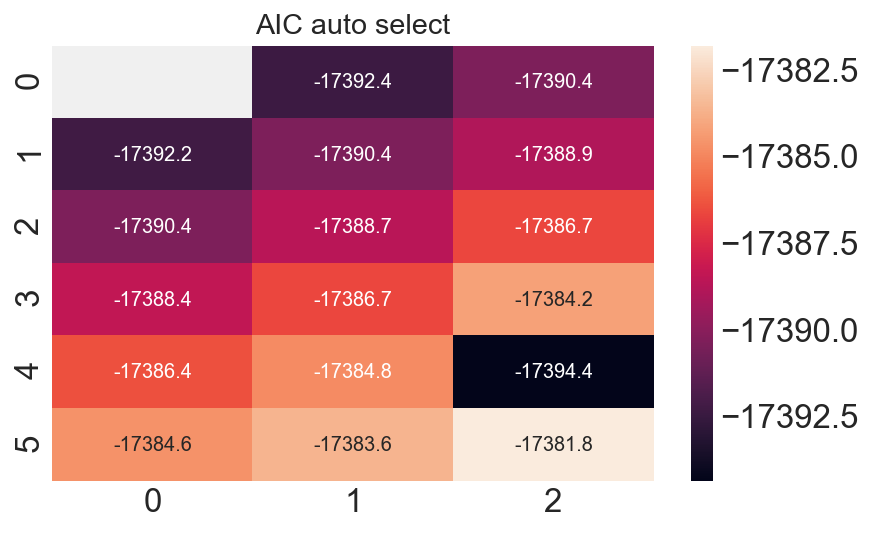

In [13]:
auto_select = sm.tsa.arma_order_select_ic(
    df['crsp'].values,
    max_ar=5, max_ma=2, ic=['aic'],
    trend='nc',
    fit_kw={'maxiter': 10000,
            'method': 'css-mle',
            'solver': 'lbfgs'})

print(auto_select.aic_min_order)

sns.heatmap(auto_select['aic'], annot=True, fmt='.1f')
plt.ylim([auto_select['aic'].shape[0], 0])
plt.title('AIC auto select')
plt.show()

In [14]:
model = ARIMA(df['crsp'].values, (3, 0, 2)).fit(start_params=np.zeros(5),
                                            trend='nc',
                                            maxiter=10000,
                                            method='css-mle')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 2528
Model:                     ARMA(3, 2)   Log Likelihood                8698.531
Method:                       css-mle   S.D. of innovations              0.008
Date:                Wed, 20 Nov 2019   AIC                         -17385.062
Time:                        18:09:45   BIC                         -17350.051
Sample:                             0   HQIC                        -17372.358
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.1215      0.353     -0.344      0.731      -0.814       0.571
ar.L2.y        0.6207      0.293      2.120      0.034       0.047       1.195
ar.L3.y       -0.0699      0.032     -2.185      0.029      -0.133      -0.007
ma.L1.y        0.2142      0.353      0.607      0.544      -0.478       0.906
ma.L2.y       -0.6053      0.312     -1.937      0.053      -1.218       0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1128           +0.0000j            1.1128            0.5000
AR.2            1.5169           +0.0000j            1.5169            0.0000
AR.3            8.4773           +0.0000j            8.4773            0.0000
MA.1           -1.1205           +0.0000j            1.1205            0.5000
MA.2            1.4744           +0.0000j            1.4744            0.0000
-----------------------------------------------------------------------------
"""

In [15]:
model = ARIMA(df['crsp'].values, (2, 0, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 2528
Model:                     ARMA(2, 1)   Log Likelihood                8707.328
Method:                       css-mle   S.D. of innovations              0.008
Date:                Wed, 20 Nov 2019   AIC                         -17404.657
Time:                        18:09:46   BIC                         -17375.481
Sample:                             0   HQIC                        -17394.070
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      4.399      0.000       0.000       0.001
ar.L1.y        0.8753      0.155      5.650      0.000       0.572       1.179
ar.L2.y       -0.0858      0.021     -4.065      0.000      -0.127      -0.044
ma.L1.y       -0.7892      0.154     -5.114      0.000      -1.092      -0.487
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3108           +0.0000j            1.3108            0.0000
AR.2            8.8945           +0.0000j            8.8945            0.0000
MA.1            1.2672           +0.0000j            1.2672            0.0000
-----------------------------------------------------------------------------
"""

0 0 nan
0 1 5.848077796148091e-05
0 2 5.848839753681861e-05
0 3 5.848624927354452e-05
0 4 5.8482786607946646e-05
1 0 5.848380387091479e-05
1 1 5.8483400645278776e-05
1 2 5.848654690317454e-05
1 3 5.848914841170276e-05
1 4 5.8491910592545e-05
2 0 5.8487302260569165e-05
2 1 5.848730733317176e-05
2 2 5.850323763574594e-05
2 3 5.8502763443051314e-05
2 4 5.850091880897253e-05
3 0 5.8483550914006304e-05
3 1 5.847910460777637e-05
3 2 5.8498506286908625e-05
3 3 5.850225371882272e-05
3 4 5.8558795169652384e-05
4 0 5.84811417058191e-05
4 1 5.8490585217913264e-05
4 2 5.8516598707938234e-05
4 3 5.856969126868355e-05


/Users/crahmede/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4 4 5.8317271346394577e-05
(4, 4) 5.8317271346394577e-05


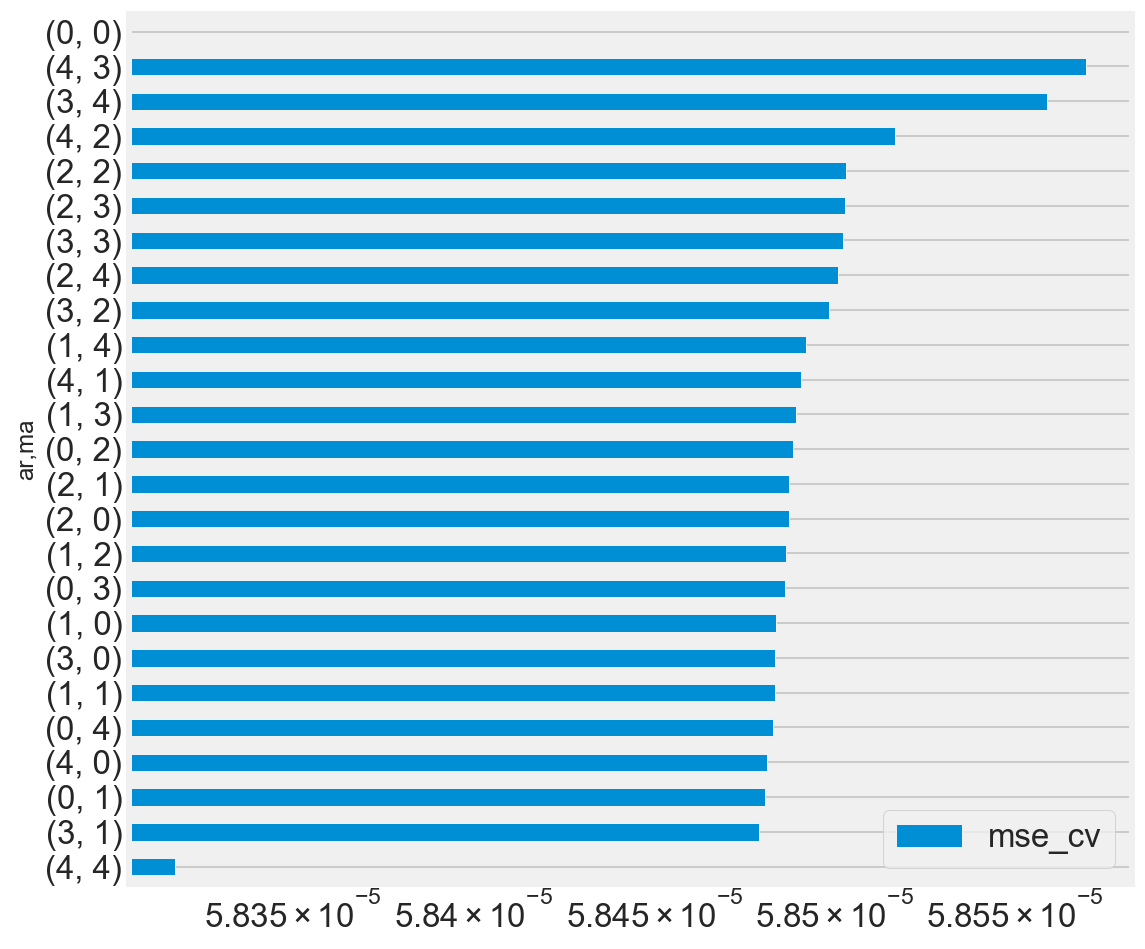

In [16]:
from sklearn.model_selection import TimeSeriesSplit

ts = TimeSeriesSplit(n_splits=3)
splits = [split for split in ts.split(df['crsp'].values)]

best_order = (0, 0)
best_mse = 10**10
scores = []

for ar_order in range(5):
    for ma_order in range(5):
        try:
            mses = []
            for i in range(ts.n_splits):
                y_train = df['crsp'].values[splits[i][0]]
                y_test = df['crsp'].values[splits[i][1]]

                model_cv = ARIMA(y_train, order=(ar_order, 0, ma_order))
            
                result_cv = model_cv.fit(start_params=np.zeros(model_cv.k_ar+model_cv.k_ma),
                               solver='lbfgs', method='css', trend='nc', ic='BIC')
                predictions_test = result_cv.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
                mses.append(((y_test - (predictions_test))**2).mean())
                
            mse_mean = np.mean(mses)
            scores.append((model_cv.k_ar, model_cv.k_ma, mse_mean))
            print(model_cv.k_ar, model_cv.k_ma, mse_mean)
            if mse_mean < best_mse:
                best_mse = mse_mean
                best_order = (model_cv.k_ar, model_cv.k_ma)

        except:
                scores.append((model_cv.k_ar, model_cv.k_ma, np.nan))
                print(model_cv.k_ar, model_cv.k_ma, np.nan)
                
print(best_order, best_mse)

df_r = pd.DataFrame(scores, columns=['ar', 'ma', 'mse_cv'])
df_r.groupby(['ar', 'ma'])[['mse_cv']].max().sort_values(by='mse_cv').plot(kind='barh', figsize=(8, 8))
plt.xscale('log')
plt.show()

### Load the Mishkin dataset. 

- Consider the time series of the logarithm of the tb1 (monthly one-month T-bill rates) values. 
- Judge from autocorrelation plots how much differencing is required to obtain a stationary time series. 
- Fit an ARMA model to the resulting time series. 

#### Bonus: Use also the columns on one-month inflation rate (pai1) and consumer price index for urban consumers (cpi).

In [17]:
data_1 = sm.datasets.get_rdataset('Mishkin', package='Ecdat')

/Users/crahmede/anaconda3/lib/python3.7/site-packages/statsmodels/datasets/utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


In [18]:
print(data_1.__doc__)

+---------+-----------------+
| Mishkin | R Documentation |
+---------+-----------------+

Inflation and Interest Rates
----------------------------

Description
~~~~~~~~~~~

monthly observations from 1950-2 to 1990-12

*number of observations* : 491

*observation* : country

*country* : United States

Usage
~~~~~

::

   data(Mishkin)

Format
~~~~~~

A time serie containing :

pai1
   one-month inflation rate (in percent, annual rate)

pai3
   three-month inflation rate (in percent, annual rate)

tb1
   one-month T-bill rate (in percent, annual rate)

tb3
   three-month T-bill rate (in percent, annual rate)

cpi
   CPI for urban consumers, all items (the 1982-1984 average is set to
   100)

Source
~~~~~~

Mishkin, F. (1992) “Is the Fisher effect for real ?”, *Journal of
Monetary Economics*, **30**, 195-215.

References
~~~~~~~~~~

Hayashi, F. (2000) *Econometrics*, Princeton University Press,
http://fhayashi.fc2web.com/hayashi_econometrics.htm, chapter 2, 176-184.

See Also
~~~~~~~~



In [19]:
dates = pd.period_range(start='1950-02-01', end='1990-12-01', freq='M')

In [20]:
df_1 = data_1.data
df_1.index = dates
df_1['tb1log'] = np.log(df_1.tb1)
df_1.head()

,pai1,pai3,tb1,tb3,cpi,tb1log
1950-02,-3.552289,1.129370,1.100854,1.129406,23.5,0.096086
1950-03,5.247540,4.001566,1.125513,1.137254,23.6,0.118239
1950-04,1.692860,4.492160,1.115715,1.142319,23.6,0.109495
1950-05,5.064298,7.817513,1.146380,1.177902,23.7,0.136609
1950-06,6.719322,9.433580,1.158520,1.167777,23.8,0.147143


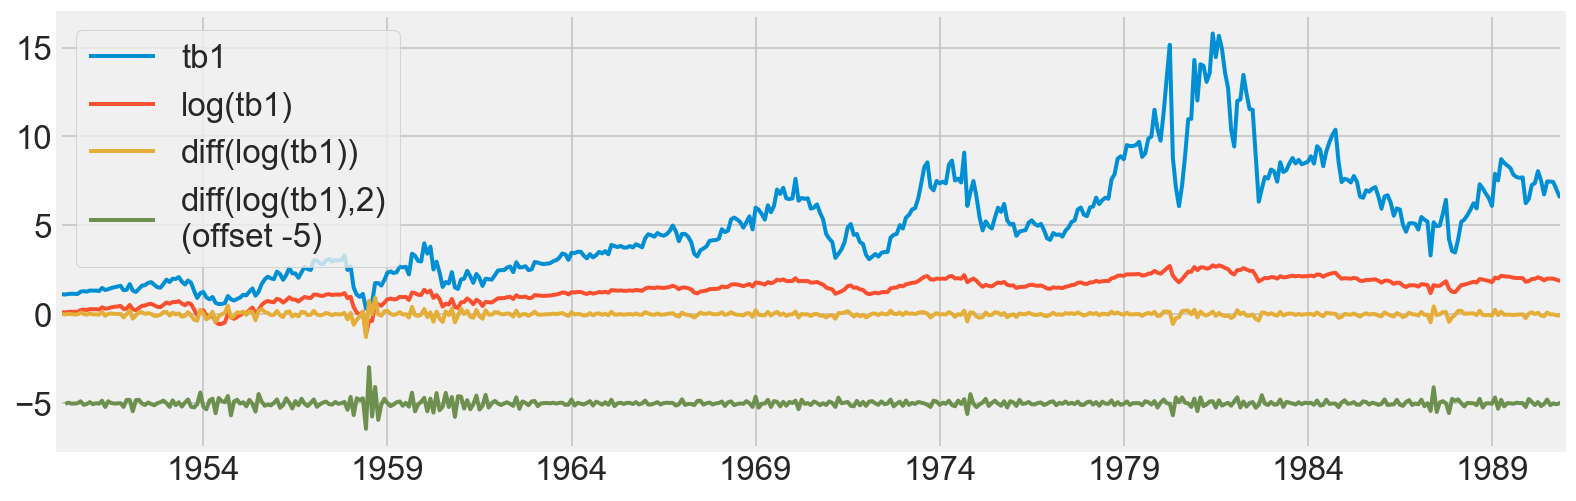

In [21]:
ax = df_1[['tb1']].plot(lw=2, figsize=(12, 4))
df_1[['tb1log']].plot(lw=2, ax=ax)
df_1[['tb1log']].diff().plot(lw=2, ax=ax)
(df_1[['tb1log']].diff().diff()-5).plot(lw=2, ax=ax)
plt.legend(['tb1', 'log(tb1)', 'diff(log(tb1))',
            'diff(log(tb1),2)\n(offset -5)'])
plt.show()

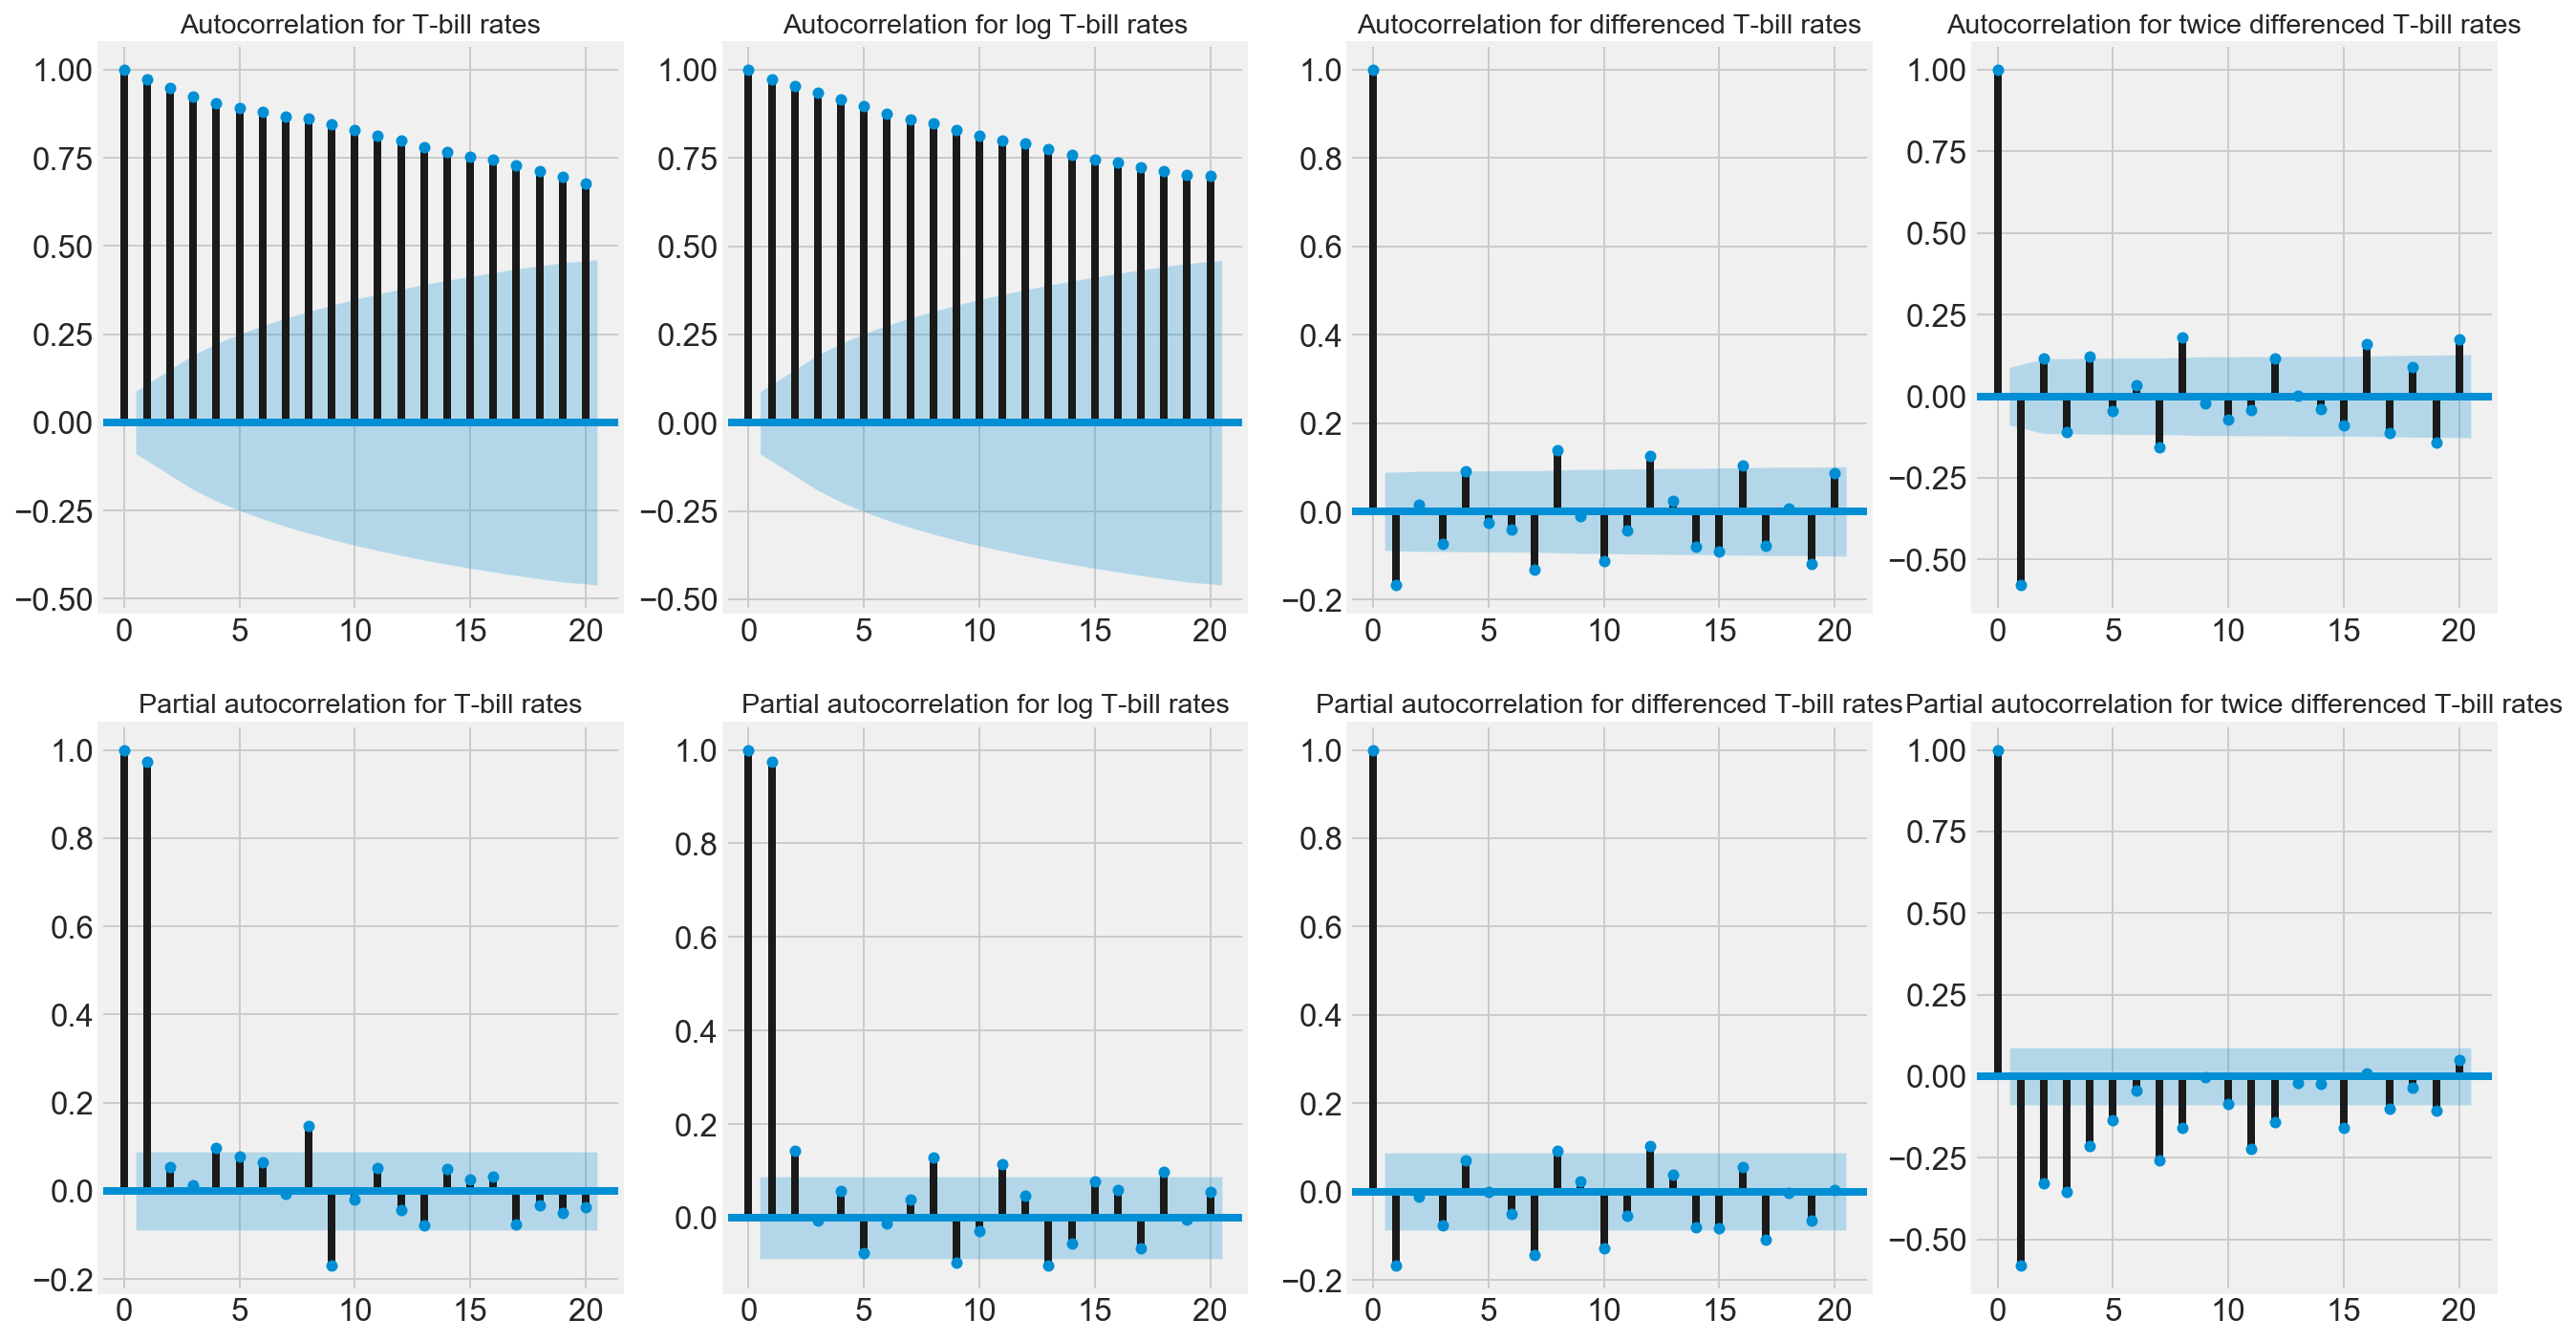

In [22]:
lags = 20
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))
plot_acf(df_1['tb1'], lags=lags,
         title='Autocorrelation for T-bill rates', ax=ax[0, 0])
plot_acf(df_1['tb1log'], lags=lags,
         title='Autocorrelation for log T-bill rates', ax=ax[0, 1])
plot_acf(df_1['tb1log'].diff()[1:], lags=lags,
         title='Autocorrelation for differenced T-bill rates', ax=ax[0, 2])
plot_acf(df_1['tb1log'].diff().diff()[2:], lags=lags,
         title='Autocorrelation for twice differenced T-bill rates', ax=ax[0, 3])

plot_pacf(df_1['tb1'], lags=lags,
          title='Partial autocorrelation for T-bill rates', ax=ax[1, 0])
plot_pacf(df_1['tb1log'], lags=lags,
          title='Partial autocorrelation for log T-bill rates', ax=ax[1, 1])
plot_pacf(df_1['tb1log'].diff()[1:], lags=lags,
          title='Partial autocorrelation for differenced T-bill rates', ax=ax[1, 2])
plot_pacf(df_1['tb1log'].diff().diff()[2:], lags=lags,
          title='Partial autocorrelation for twice differenced T-bill rates', ax=ax[1, 3])
plt.show()

(4, 2)


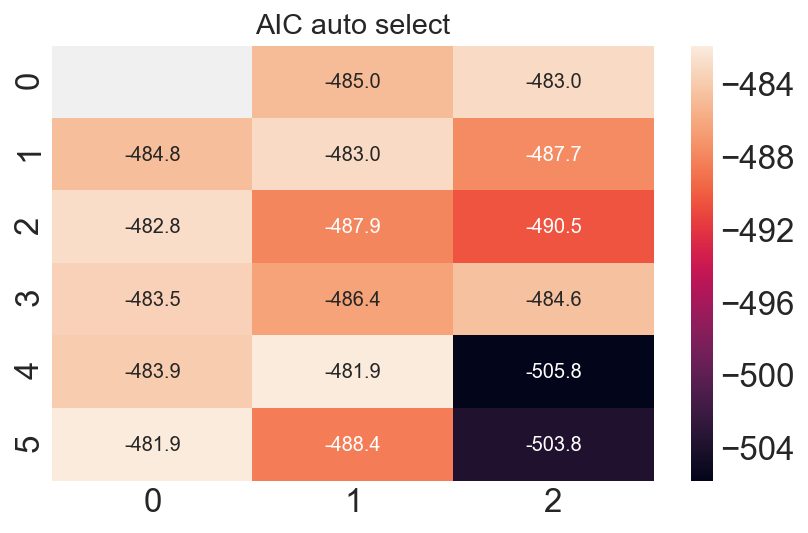

In [23]:
auto_select = sm.tsa.arma_order_select_ic(
    df_1['tb1log'].diff()[1:],
    max_ar=5, max_ma=2, ic=['aic'],
    trend='nc',
    fit_kw={'maxiter': 1000, 'solver': 'lbfgs'})

print(auto_select.aic_min_order)

sns.heatmap(auto_select['aic'], annot=True, fmt='.1f')
plt.ylim([auto_select['aic'].shape[0], 0])
plt.title('AIC auto select')
plt.show()

(2, 2)


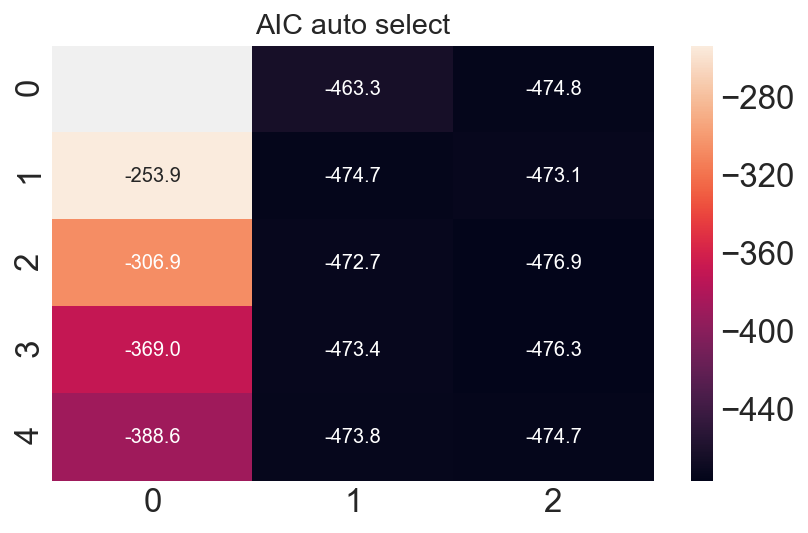

In [24]:
auto_select = sm.tsa.arma_order_select_ic(
    df_1['tb1log'].diff().diff()[2:],
    max_ar=4, max_ma=2, ic=['aic'],
    trend='nc',
    fit_kw={'maxiter': 1000, 'solver': 'lbfgs'})

print(auto_select.aic_min_order)

sns.heatmap(auto_select['aic'], annot=True, fmt='.1f')
plt.ylim([auto_select['aic'].shape[0], 0])
plt.title('AIC auto select')
plt.show()

In [25]:
model = ARIMA(df_1['tb1log'], (4, 1, 2)).fit(trend='nc')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.tb1log   No. Observations:                  490
Model:                 ARIMA(4, 1, 2)   Log Likelihood                 259.907
Method:                       css-mle   S.D. of innovations              0.142
Date:                Wed, 20 Nov 2019   AIC                           -505.814
Time:                        18:10:29   BIC                           -476.453
Sample:                    03-31-1950   HQIC                          -494.282
                         - 12-31-1990                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.D.tb1log    -0.1959      0.057     -3.453      0.001      -0.307      -0.085
ar.L2.D.tb1log    -0.8914      0.055    -16.081      0.000      -1.000      -0.783
ar.L3.D.tb1log    -0.1995      0.048     -4.195      0.000      -0.293      -0.106
ar.L4.D.tb1log     0.0772      0.048      1.611      0.108      -0.017       0.171
ma.L1.D.tb1log     0.0319      0.036      0.890      0.374      -0.038       0.102
ma.L2.D.tb1log     0.9234      0.036     25.303      0.000       0.852       0.995
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0044           -1.0140j            1.0140           -0.2493
AR.2            0.0044           +1.0140j            1.0140            0.2493
AR.3           -2.4884           -0.0000j            2.4884           -0.5000
AR.4            5.0644           -0.0000j            5.0644           -0.0000
MA.1           -0.0173           -1.0405j            1.0407           -0.2526
MA.2           -0.0173           +1.0405j            1.0407            0.2526
-----------------------------------------------------------------------------
"""

In [26]:
model.sigma2

0.020233036260254647

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
# compare to baseline predicting the mean
mean_squared_error(df_1['tb1log'].diff()[1:], [df_1['tb1log'].diff()[1:].mean()] * len(df_1['tb1log'].diff()[1:]))

0.022189522591025933

In [29]:
# compare to predicting always the last value
mean_squared_error(df_1['tb1log'].diff()[1:][1:], df_1['tb1log'].diff()[1:].shift(1)[1:])

0.05187353943023768

In [30]:
model = ARIMA(df_1['tb1log'], (2, 2, 2)).fit(trend='nc')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D2.tb1log   No. Observations:                  489
Model:                 ARIMA(2, 2, 2)   Log Likelihood                 243.456
Method:                       css-mle   S.D. of innovations              0.146
Date:                Wed, 20 Nov 2019   AIC                           -476.911
Time:                        18:10:36   BIC                           -455.949
Sample:                    04-30-1950   HQIC                          -468.678
                         - 12-31-1990                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ar.L1.D2.tb1log    -1.0975      0.060    -18.319      0.000      -1.215      -0.980
ar.L2.D2.tb1log    -0.1180      0.049     -2.432      0.015      -0.213      -0.023
ma.L1.D2.tb1log    -0.0487      0.039     -1.259      0.208      -0.124       0.027
ma.L2.D2.tb1log    -0.9513      0.039    -24.634      0.000      -1.027      -0.876
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0239           +0.0000j            1.0239            0.5000
AR.2           -8.2738           +0.0000j            8.2738            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0512           +0.0000j            1.0512            0.5000
-----------------------------------------------------------------------------
"""

In [31]:
model.sigma2

0.021341243783169272

0 0 nan
0 1 0.013198039280946173
0 2 0.013209276256626655
0 3 0.013262673254448083
0 4 0.013385191303223779
1 0 0.013223580322812898
1 1 0.020080464842831897
1 2 0.019139307490552825
1 3 0.019258554033017614
1 4 0.013412667538266107
2 0 0.013261565309513093
2 1 0.019211519338130086
2 2 0.019664328603357126
2 3 0.019139277602417543
2 4 0.012976082918376756
3 0 0.013446672317686302
3 1 0.019352913050374548
3 2 0.019689146226027857
3 3 0.020452769815848603
3 4 0.020063771438499554
4 0 0.01365622238098227
4 1 0.013643062055514245
4 2 0.013668897739219229
4 3 0.0195561231297202
4 4 0.02015924807031465
(2, 4) 0.012976082918376756


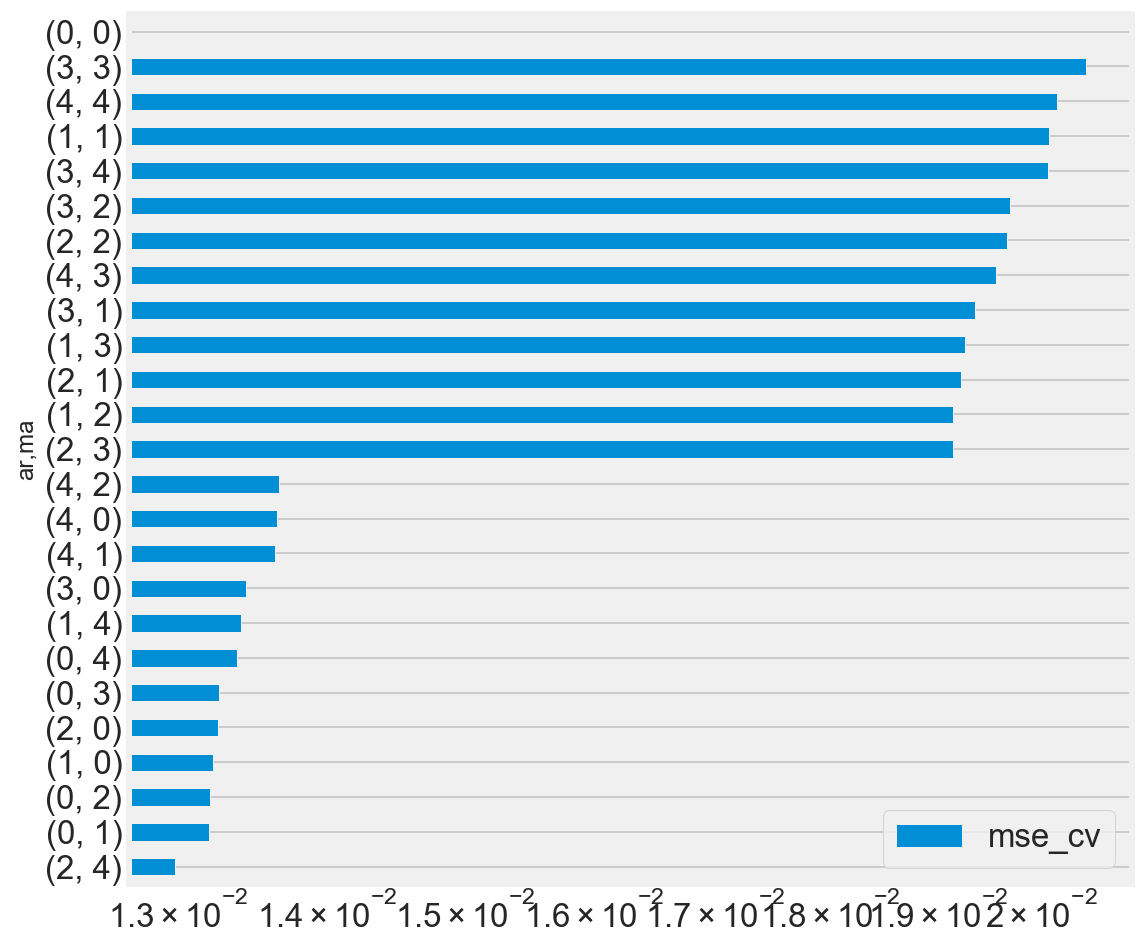

In [32]:
from sklearn.model_selection import TimeSeriesSplit

ts = TimeSeriesSplit(n_splits=3)
splits = [split for split in ts.split(df_1['tb1log'].diff()[1:].values)]

best_order = (0, 0)
best_mse = 10**10
scores = []

for ar_order in range(5):
    for ma_order in range(5):
        try:
            mses = []
            for i in range(ts.n_splits):
                y_train = df_1['tb1log'].diff()[1:][splits[i][0]]
                y_test = df_1['tb1log'].diff()[1:][splits[i][1]]

                model_cv = ARIMA(y_train, order=(ar_order, 0, ma_order))
            
                result_cv = model_cv.fit(start_params=np.zeros(model_cv.k_ar+model_cv.k_ma),
                               solver='lbfgs', method='css', trend='nc', ic='BIC')
                predictions_test = result_cv.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
                mses.append(((y_test - (predictions_test))**2).mean())
                
            mse_mean = np.mean(mses)
            scores.append((model_cv.k_ar, model_cv.k_ma, mse_mean))
            print(model_cv.k_ar, model_cv.k_ma, mse_mean)
            if mse_mean < best_mse:
                best_mse = mse_mean
                best_order = (model_cv.k_ar, model_cv.k_ma)

        except:
                scores.append((model_cv.k_ar, model_cv.k_ma, np.nan))
                print(model_cv.k_ar, model_cv.k_ma, np.nan)
                
print(best_order, best_mse)

df_r = pd.DataFrame(scores, columns=['ar', 'ma', 'mse_cv'])
df_r.groupby(['ar', 'ma'])[['mse_cv']].max().sort_values(by='mse_cv').plot(kind='barh', figsize=(8, 8))
plt.xscale('log')
plt.show()

#### With external predictors

In [33]:
model = ARIMA(endog=df_1['tb1log'], 
             exog=df_1[['pai1', 'cpi']],
             order=(4, 1, 2))
result = model.fit(trend='nc')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.tb1log   No. Observations:                  490
Model:                 ARIMA(4, 1, 2)   Log Likelihood                 261.275
Method:                       css-mle   S.D. of innovations              0.142
Date:                Wed, 20 Nov 2019   AIC                           -504.549
Time:                        18:10:53   BIC                           -466.800
Sample:                    03-31-1950   HQIC                          -489.724
                         - 12-31-1990                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
pai1               0.0025      0.002      1.631      0.104      -0.000       0.005
cpi               -0.0001      0.000     -1.015      0.311      -0.000       0.000
ar.L1.D.tb1log    -0.1955      0.057     -3.427      0.001      -0.307      -0.084
ar.L2.D.tb1log    -0.8859      0.056    -15.734      0.000      -0.996      -0.776
ar.L3.D.tb1log    -0.1984      0.048     -4.164      0.000      -0.292      -0.105
ar.L4.D.tb1log     0.0813      0.048      1.681      0.093      -0.014       0.176
ma.L1.D.tb1log     0.0330      0.036      0.910      0.363      -0.038       0.104
ma.L2.D.tb1log     0.9199      0.037     24.721      0.000       0.847       0.993
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0042           -1.0147j            1.0147           -0.2493
AR.2            0.0042           +1.0147j            1.0147            0.2493
AR.3           -2.4482           -0.0000j            2.4482           -0.5000
AR.4            4.8807           -0.0000j            4.8807           -0.0000
MA.1           -0.0180           -1.0425j            1.0426           -0.2527
MA.2           -0.0180           +1.0425j            1.0426            0.2527
-----------------------------------------------------------------------------
"""

0 0 0.013026561930923585
0 1 0.013221362093511801
0 2 0.013231724919424565
0 3 0.013290929240001062
0 4 0.013382998749412114
1 0 0.013246935316304739
1 1 0.02028213985077135
1 2 0.019409987186378295
1 3 0.019549386124979782
1 4 0.013422084313326735
2 0 0.013284035812819861
2 1 0.019811726360352302
2 2 0.020140353853604905


/Users/crahmede/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2 3 0.019623643362923143
2 4 0.012985917134468408
3 0 0.013490324112519348
3 1 0.019634260963359275
3 2 0.01970167364531664
3 3 0.0195351597426786
3 4 0.020321895830759718
4 0 0.01369115888568802
4 1 0.01367597112927127
4 2 0.013797090151234455


/Users/crahmede/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4 3 0.020913163302616722


/Users/crahmede/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4 4 0.02156516503653919
(2, 4) 0.012985917134468408


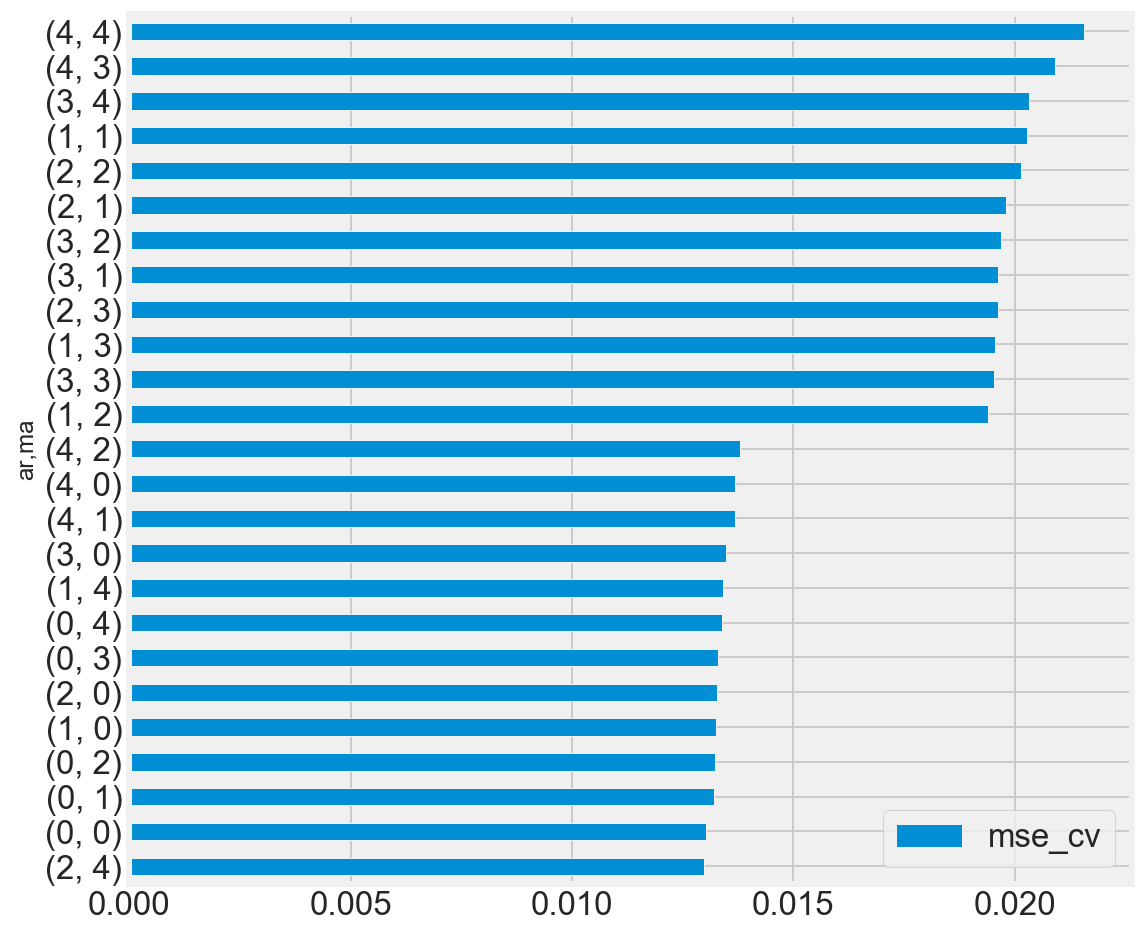

In [34]:
from sklearn.model_selection import TimeSeriesSplit

ts = TimeSeriesSplit(n_splits=3)
splits = [split for split in ts.split(df_1['tb1log'].diff()[1:].values)]

best_order = (0, 0)
best_mse = 10**10
scores = []

for ar_order in range(5):
    for ma_order in range(5):
        try:
            mses = []
            for i in range(ts.n_splits):
                y_train = df_1['tb1log'].diff()[1:].values[splits[i][0]]
                y_test = df_1['tb1log'].diff()[1:].values[splits[i][1]]
                X_train = df_1[['pai1', 'cpi']][1:].values[splits[i][0]]
                X_test = df_1[['pai1', 'cpi']][1:].values[splits[i][1]]
                
                model_cv = ARIMA(endog=y_train, exog=X_train, order=(ar_order, 0, ma_order))
            
                result_cv = model_cv.fit(start_params=np.zeros(model_cv.k_ar+model_cv.k_ma+model_cv.k_exog),
                               solver='lbfgs', method='css', trend='nc', ic='BIC')
                predictions_test = result_cv.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test)
                mses.append(((y_test - (predictions_test))**2).mean())
                
            mse_mean = np.mean(mses)
            scores.append((model_cv.k_ar, model_cv.k_ma, mse_mean))
            print(model_cv.k_ar, model_cv.k_ma, mse_mean)
            if mse_mean < best_mse:
                best_mse = mse_mean
                best_order = (model_cv.k_ar, model_cv.k_ma)

        except:
                scores.append((model_cv.k_ar, model_cv.k_ma, np.nan))
                print(model_cv.k_ar, model_cv.k_ma, np.nan)
                
print(best_order, best_mse)

df_r = pd.DataFrame(scores, columns=['ar', 'ma', 'mse_cv'])
df_r.groupby(['ar', 'ma'])[['mse_cv']].max().sort_values(by='mse_cv').plot(kind='barh', figsize=(8, 8))
plt.show()